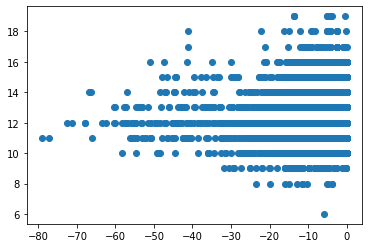

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plotting import get_unique_output
from Levenshtein import distance as lev_dist


source = "output_original-20240122-152625.csv"
shared_pre_dir="../output/"
output = pd.read_csv(shared_pre_dir + source)

TCRs = output["CDR3b"]
peps = output["peptide"]
scores = output["score"]
lev_dists = [lev_dist(TCR, pep) for (TCR, pep) in zip(TCRs, peps)]

plt.scatter(scores, lev_dists)

In [7]:
# First, fix a peptide, and then scatter the TCRs based on that
one_peptide_output = output.loc[output["peptide"] == "GILGFVFTL"]

In [22]:
import numpy as np
import itertools

def pairwise_ratios(output):
    scores = {}
    pep = "GILGFVFTL"
    TCRs = np.array(output["CDR3b"])
    print(TCRs)

    for index, row in output.iterrows():
        TCR = row["CDR3b"]
        score = row["score"]
        scores[TCR] = score

    score_ratios = []
    dist_ratios = []

    for (T1, T2) in itertools.combinations(TCRs, 2):
        score_ratio = scores[T1] / scores[T2]
        dist_ratio = lev_dist(T1, pep) / lev_dist(T2, pep)
        # print(score_ratio)
        # print(dist_ratio)
        
        score_ratios.append(score_ratio)
        dist_ratios.append(dist_ratio)

    return score_ratios, dist_ratios



In [23]:
score_ratios, dist_ratios = pairwise_ratios(one_peptide_output)

['CASSIRASYEQYF' 'CASSIRSTDTQYF' 'CASSIRAADTQYF' ... 'CASSQGQEKETQYF'
 'CSARDQQGQNTGELFF' 'CASSLSGVPHNNEQFF']


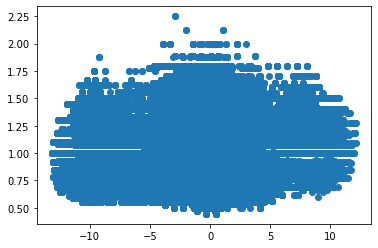

In [26]:
plt.scatter(np.log(score_ratios), dist_ratios)

So presumably we have no correlation here between the ratios? I guess this is roughly expected.

Would we get different results if we had weighting on the distance?